In [1]:
%matplotlib inline

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits, load_iris

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, FunctionTransformer, LabelEncoder, PolynomialFeatures, LabelBinarizer
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge, ElasticNet

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import classification_report, RocCurveDisplay
from sklearn.metrics import roc_curve, auc

# Tree and Ensemble Methods

In [5]:
data = load_iris()

In [6]:
attributes, target = data['data'], data['target']

In [14]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
tree = DecisionTreeClassifier()

In [8]:
tree.fit(attributes, target)

DecisionTreeClassifier()

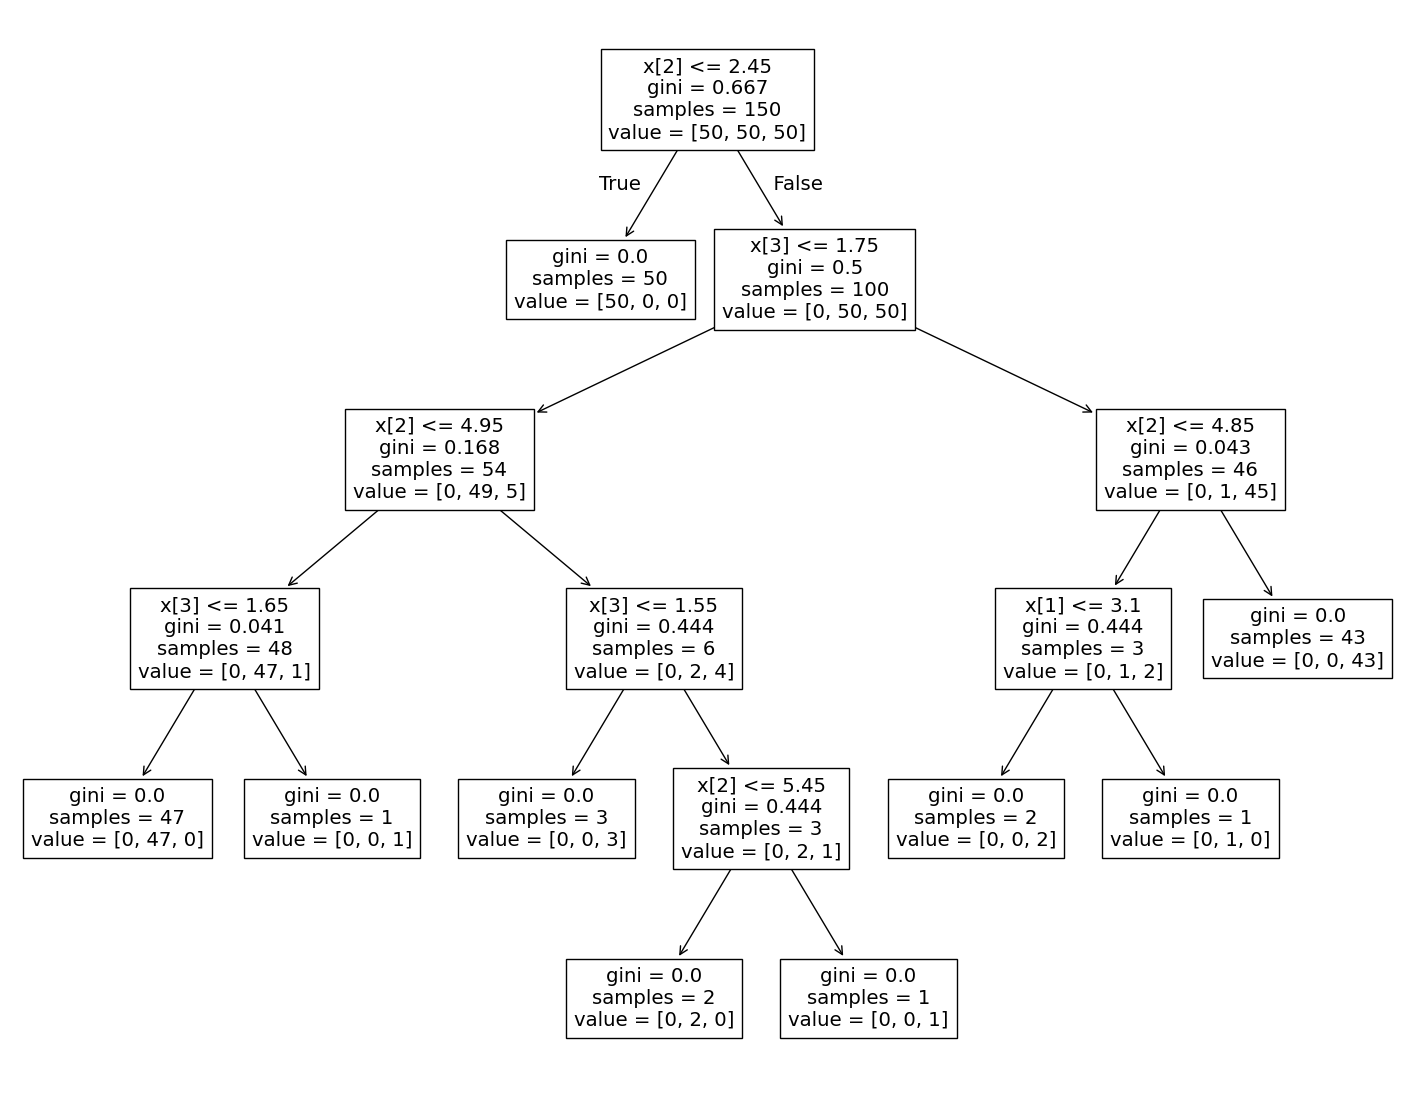

In [13]:
plt.figure(figsize = (18, 14))
plot_tree(tree)
plt.show()

# Information gain

![information gain formula](information_gain.png)

![measures](measures.png)

![impurity measures visualization](impurity_measures.png)

<b>Settings</b>

In [15]:
digits = load_digits()

In [16]:
attributes, target = digits['data'], digits['target']

In [17]:
attributes.shape

(1797, 64)

In [18]:
tree = DecisionTreeClassifier()

In [19]:
tree.fit(attributes, target)

DecisionTreeClassifier()

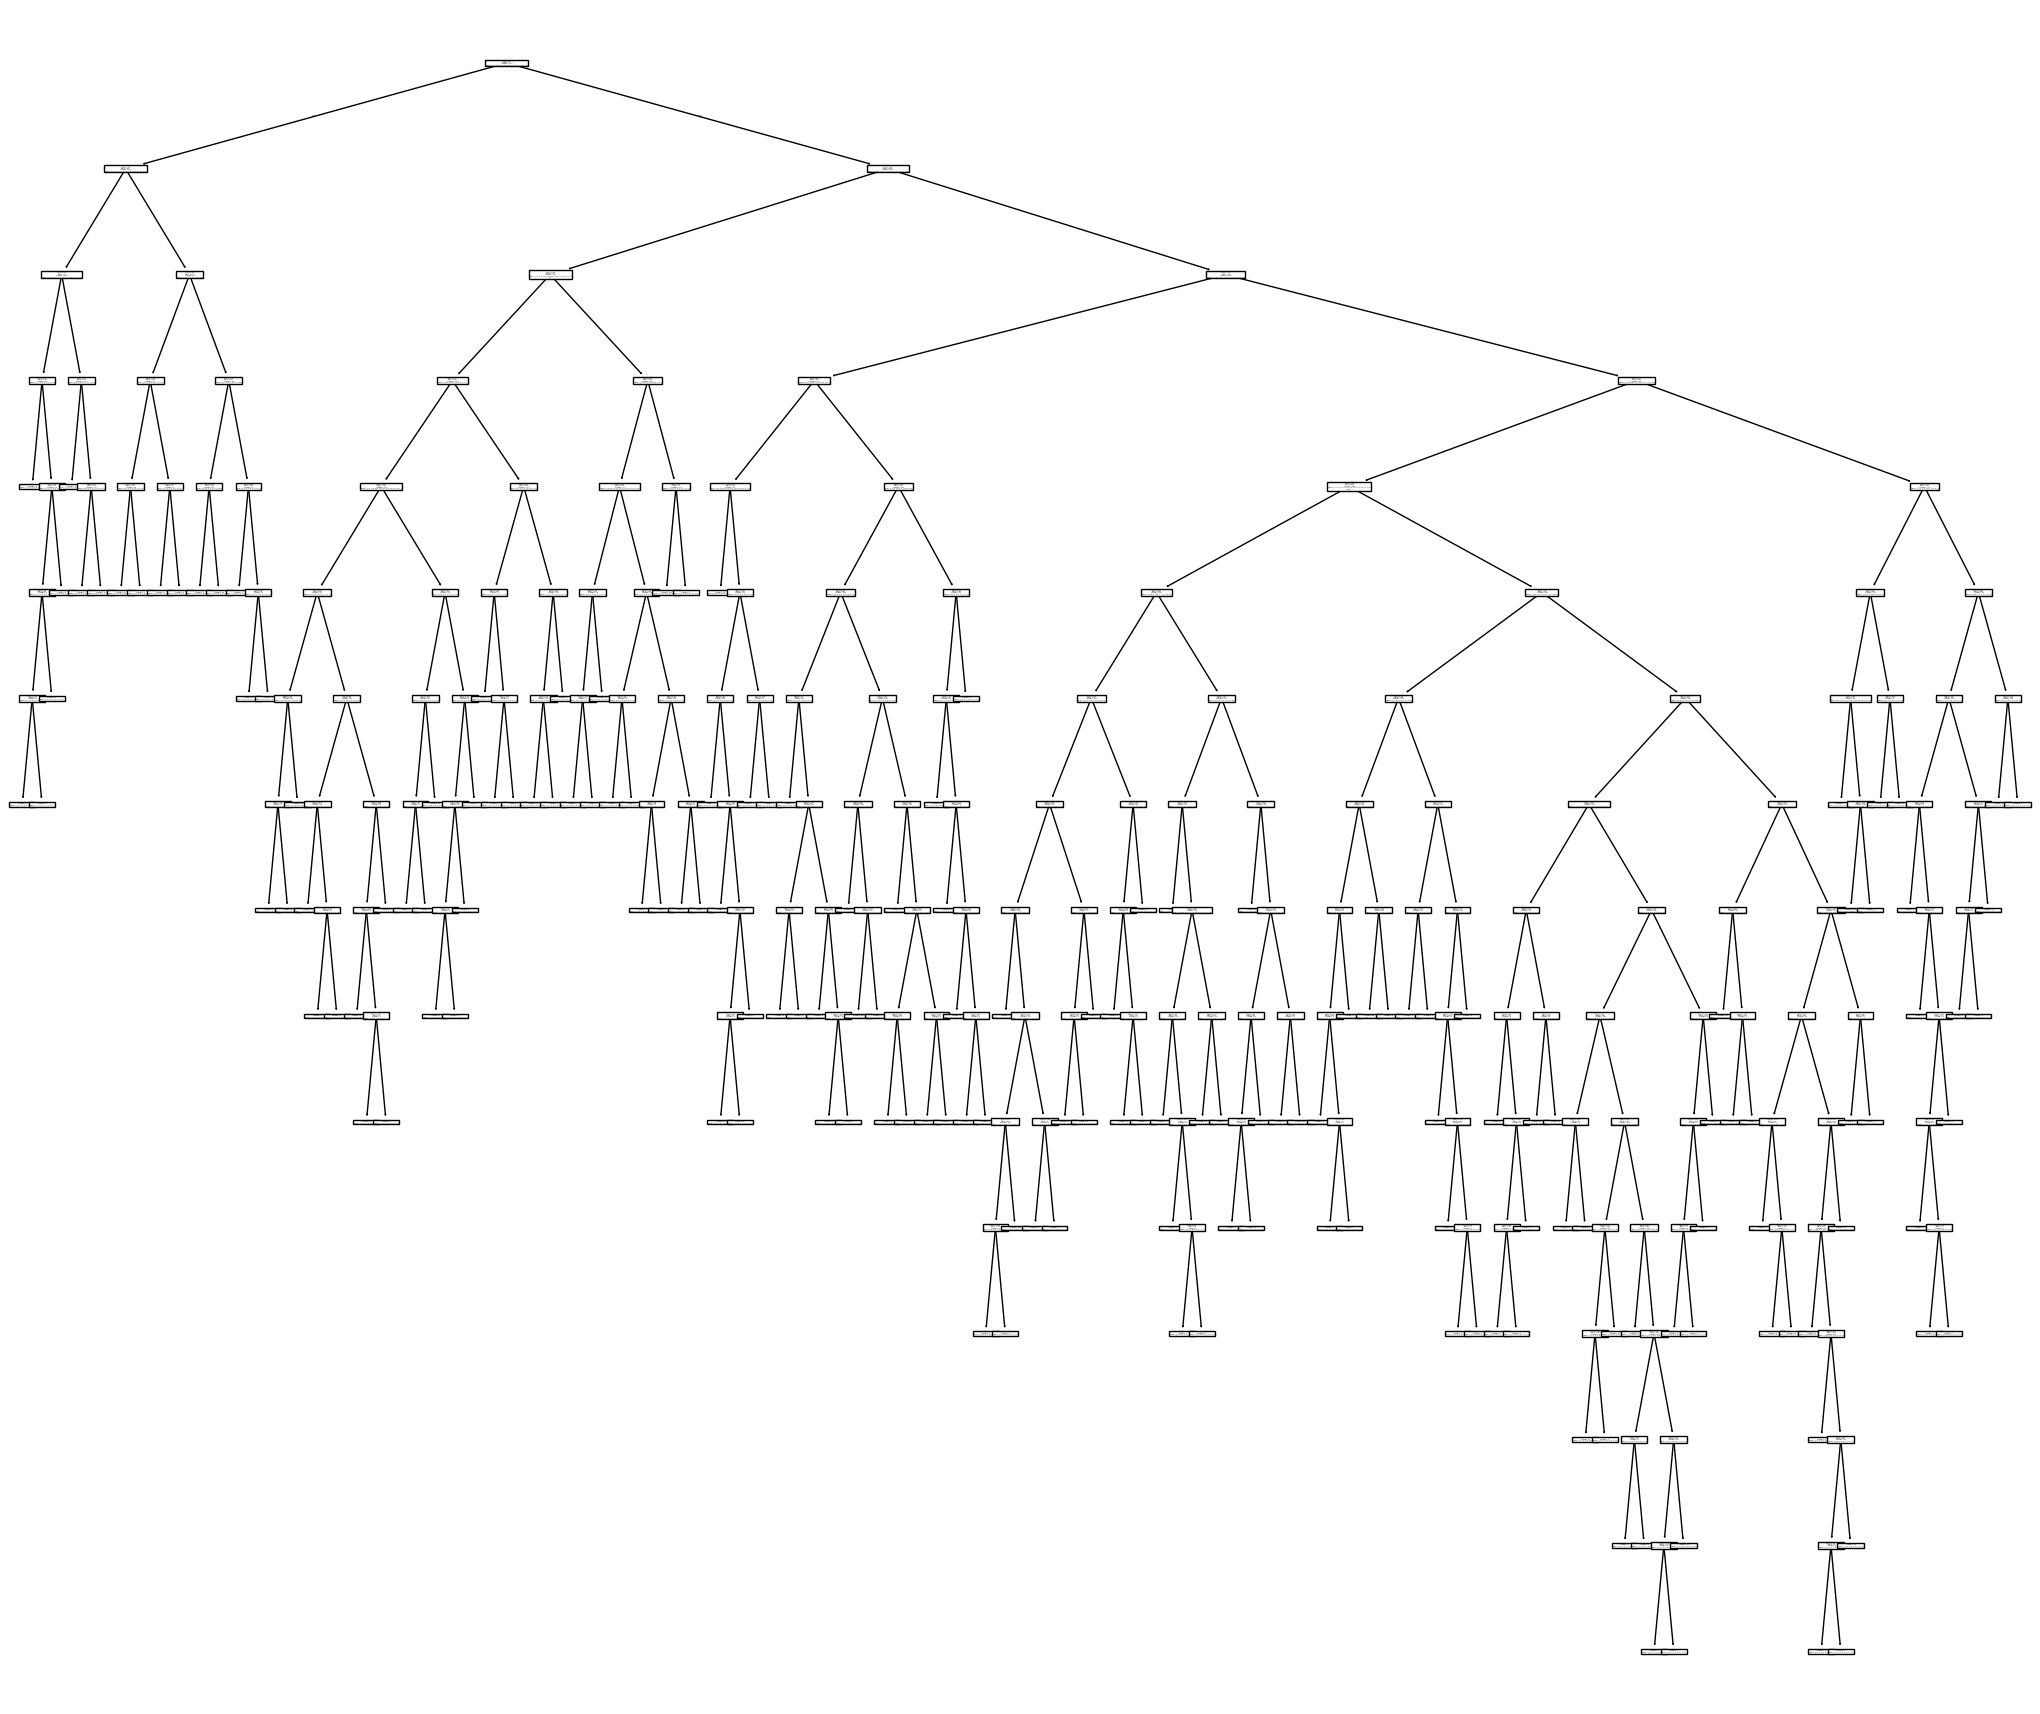

In [21]:
plt.figure(figsize = (26, 22))
plot_tree(tree)
plt.show()

In [23]:
print(export_text(tree))

|--- feature_36 <= 0.50
|   |--- feature_28 <= 2.50
|   |   |--- feature_21 <= 0.50
|   |   |   |--- feature_61 <= 0.50
|   |   |   |   |--- class: 5
|   |   |   |--- feature_61 >  0.50
|   |   |   |   |--- feature_41 <= 5.50
|   |   |   |   |   |--- feature_54 <= 5.50
|   |   |   |   |   |   |--- feature_13 <= 5.50
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- feature_13 >  5.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_54 >  5.50
|   |   |   |   |   |   |--- class: 6
|   |   |   |   |--- feature_41 >  5.50
|   |   |   |   |   |--- class: 4
|   |   |--- feature_21 >  0.50
|   |   |   |--- feature_26 <= 2.00
|   |   |   |   |--- class: 2
|   |   |   |--- feature_26 >  2.00
|   |   |   |   |--- feature_50 <= 2.50
|   |   |   |   |   |--- class: 4
|   |   |   |   |--- feature_50 >  2.50
|   |   |   |   |   |--- class: 0
|   |--- feature_28 >  2.50
|   |   |--- feature_21 <= 6.50
|   |   |   |--- feature_51 <= 9.50
|   |   |   |   

In [25]:
tree.tree_.max_depth # check the depth of the tree

15

<b> max_depth</b>

In [32]:
tree = DecisionTreeClassifier(max_depth = 4) # we add bias hier, we reduce the variance (we did bias-variance trade-off)

In [28]:
tree.fit(attributes, target)

DecisionTreeClassifier(max_depth=4)

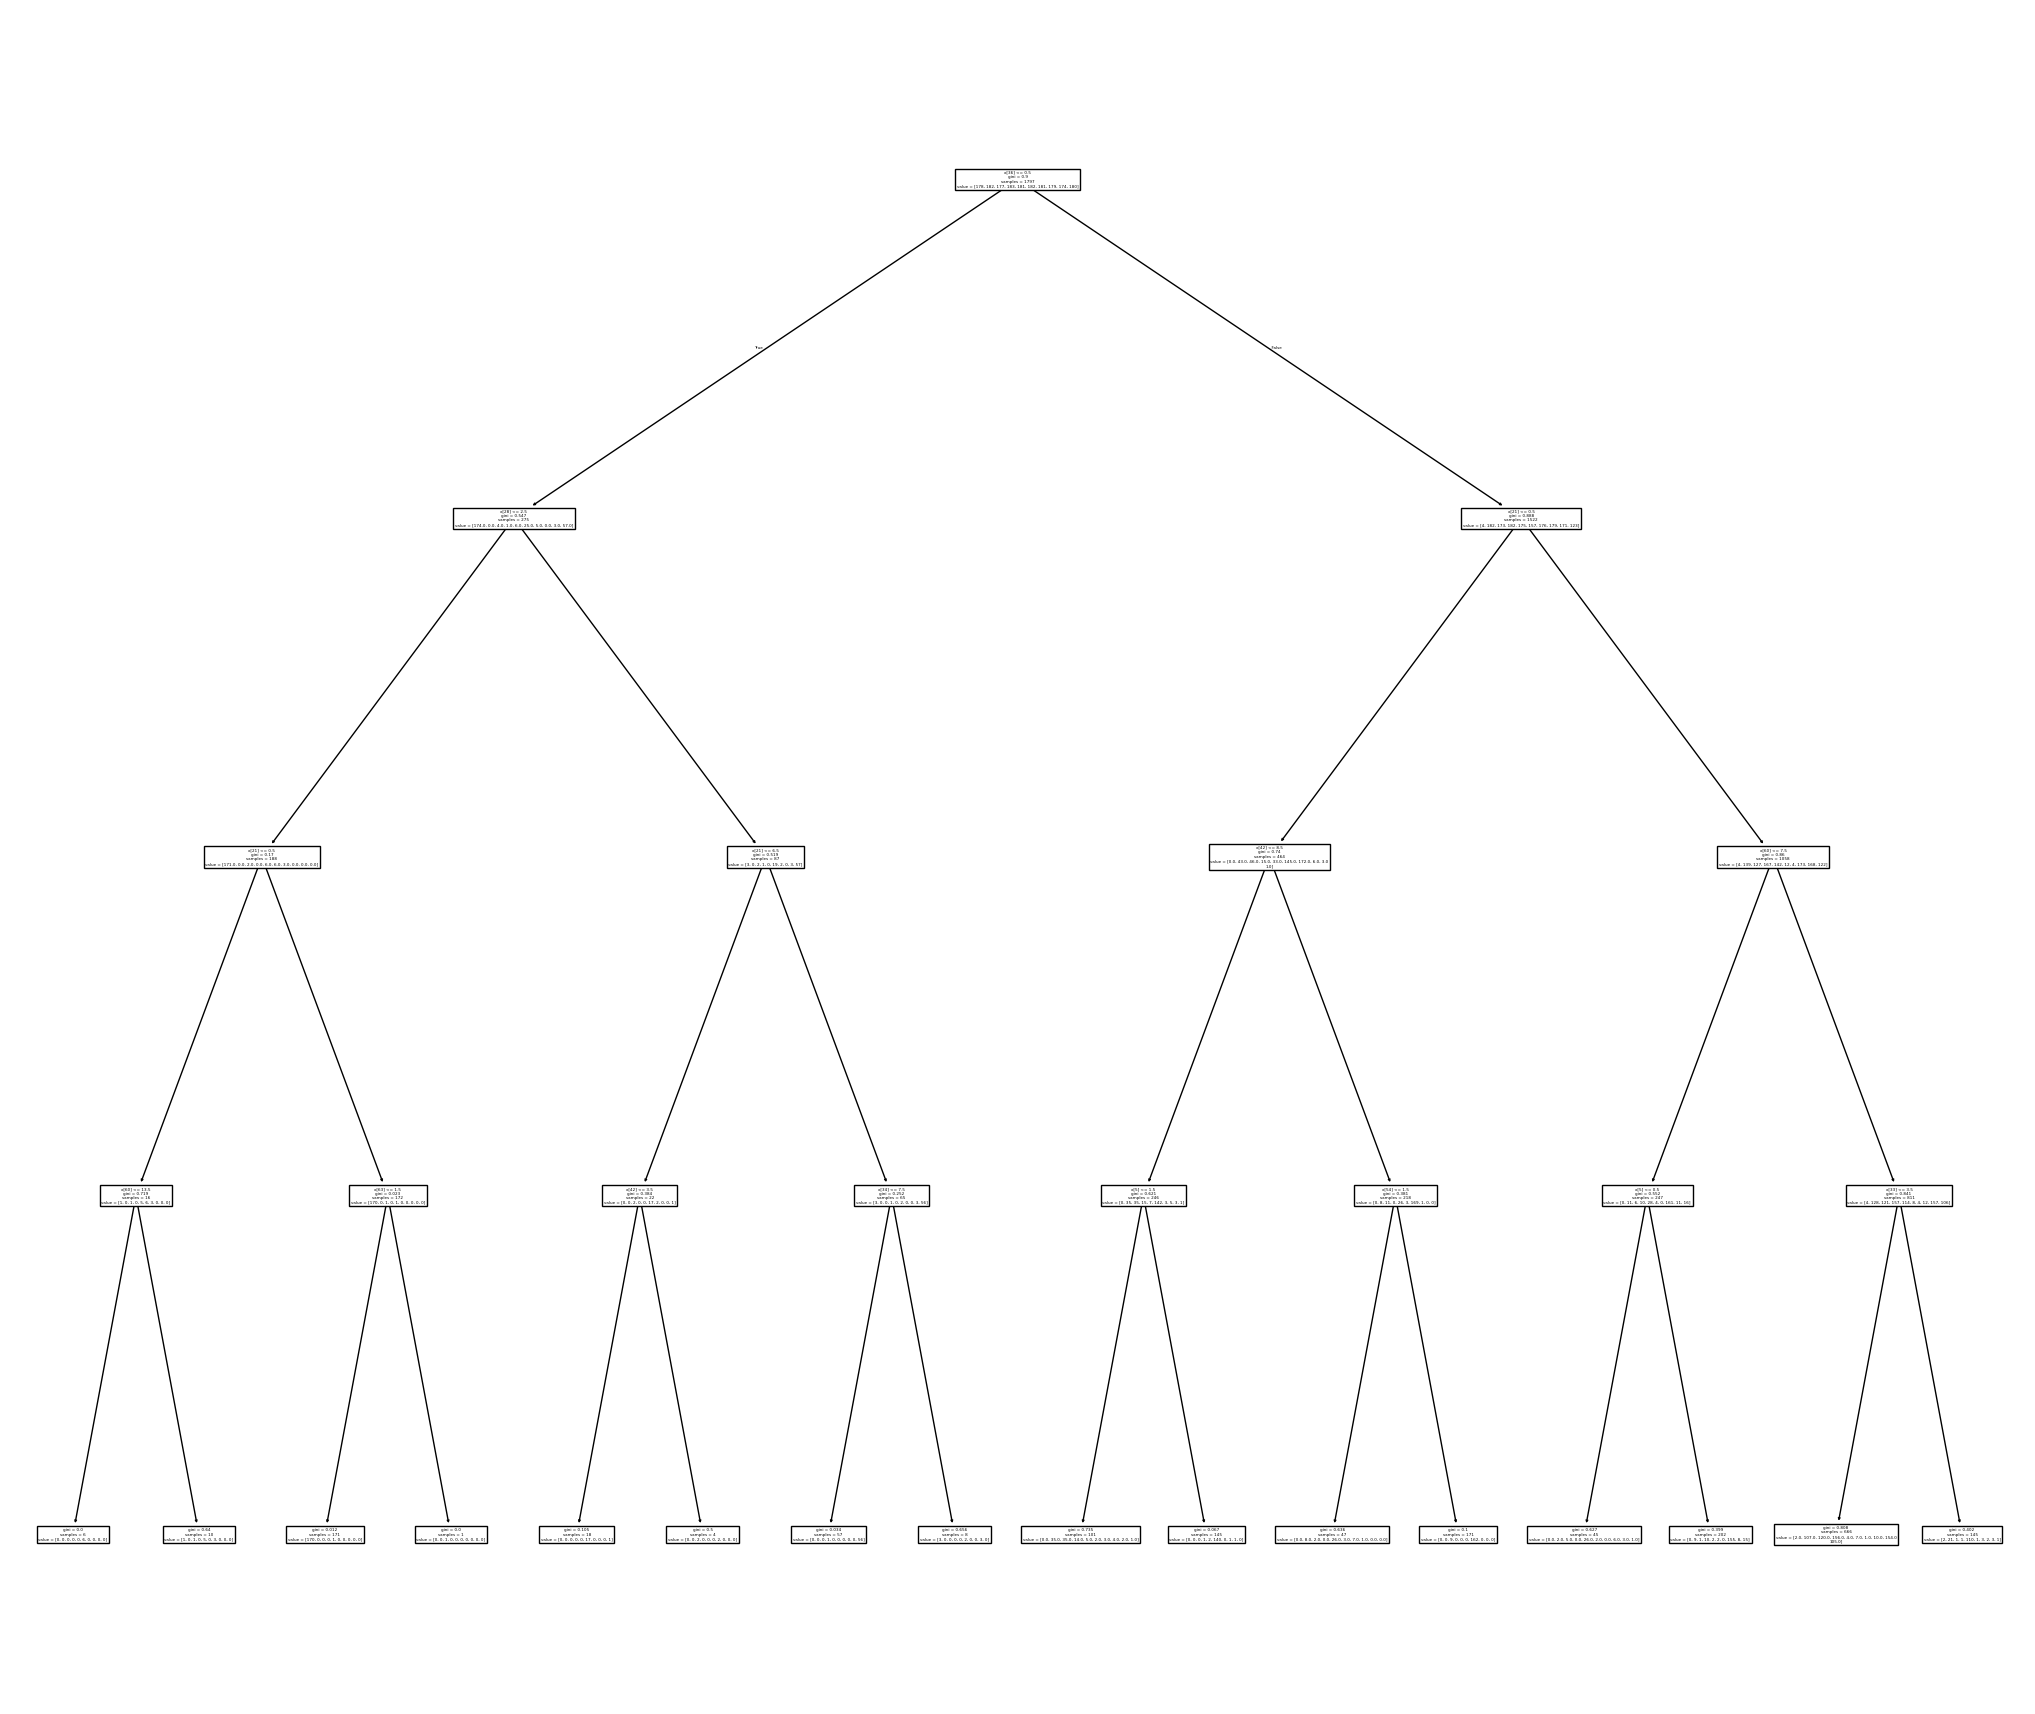

In [29]:
plt.figure(figsize = (26, 22))
plot_tree(tree)
plt.show()

In [30]:
print(export_text(tree))

|--- feature_36 <= 0.50
|   |--- feature_28 <= 2.50
|   |   |--- feature_21 <= 0.50
|   |   |   |--- feature_60 <= 13.50
|   |   |   |   |--- class: 5
|   |   |   |--- feature_60 >  13.50
|   |   |   |   |--- class: 4
|   |   |--- feature_21 >  0.50
|   |   |   |--- feature_63 <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_63 >  1.50
|   |   |   |   |--- class: 2
|   |--- feature_28 >  2.50
|   |   |--- feature_21 <= 6.50
|   |   |   |--- feature_42 <= 3.50
|   |   |   |   |--- class: 5
|   |   |   |--- feature_42 >  3.50
|   |   |   |   |--- class: 2
|   |   |--- feature_21 >  6.50
|   |   |   |--- feature_34 <= 7.50
|   |   |   |   |--- class: 9
|   |   |   |--- feature_34 >  7.50
|   |   |   |   |--- class: 0
|--- feature_36 >  0.50
|   |--- feature_21 <= 0.50
|   |   |--- feature_42 <= 8.50
|   |   |   |--- feature_5 <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_5 >  1.50
|   |   |   |   |--- class: 5
|   |   |--- feature_42 >  8.50
|   |   |   |---

In [31]:
tree.tree_.max_depth

4

<b>min_samples_split, min_samples_leaf</b>

In [35]:
tree = DecisionTreeClassifier(min_samples_split = 20, min_samples_leaf = 5)

In [36]:
tree.fit(attributes, target)

DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=20)

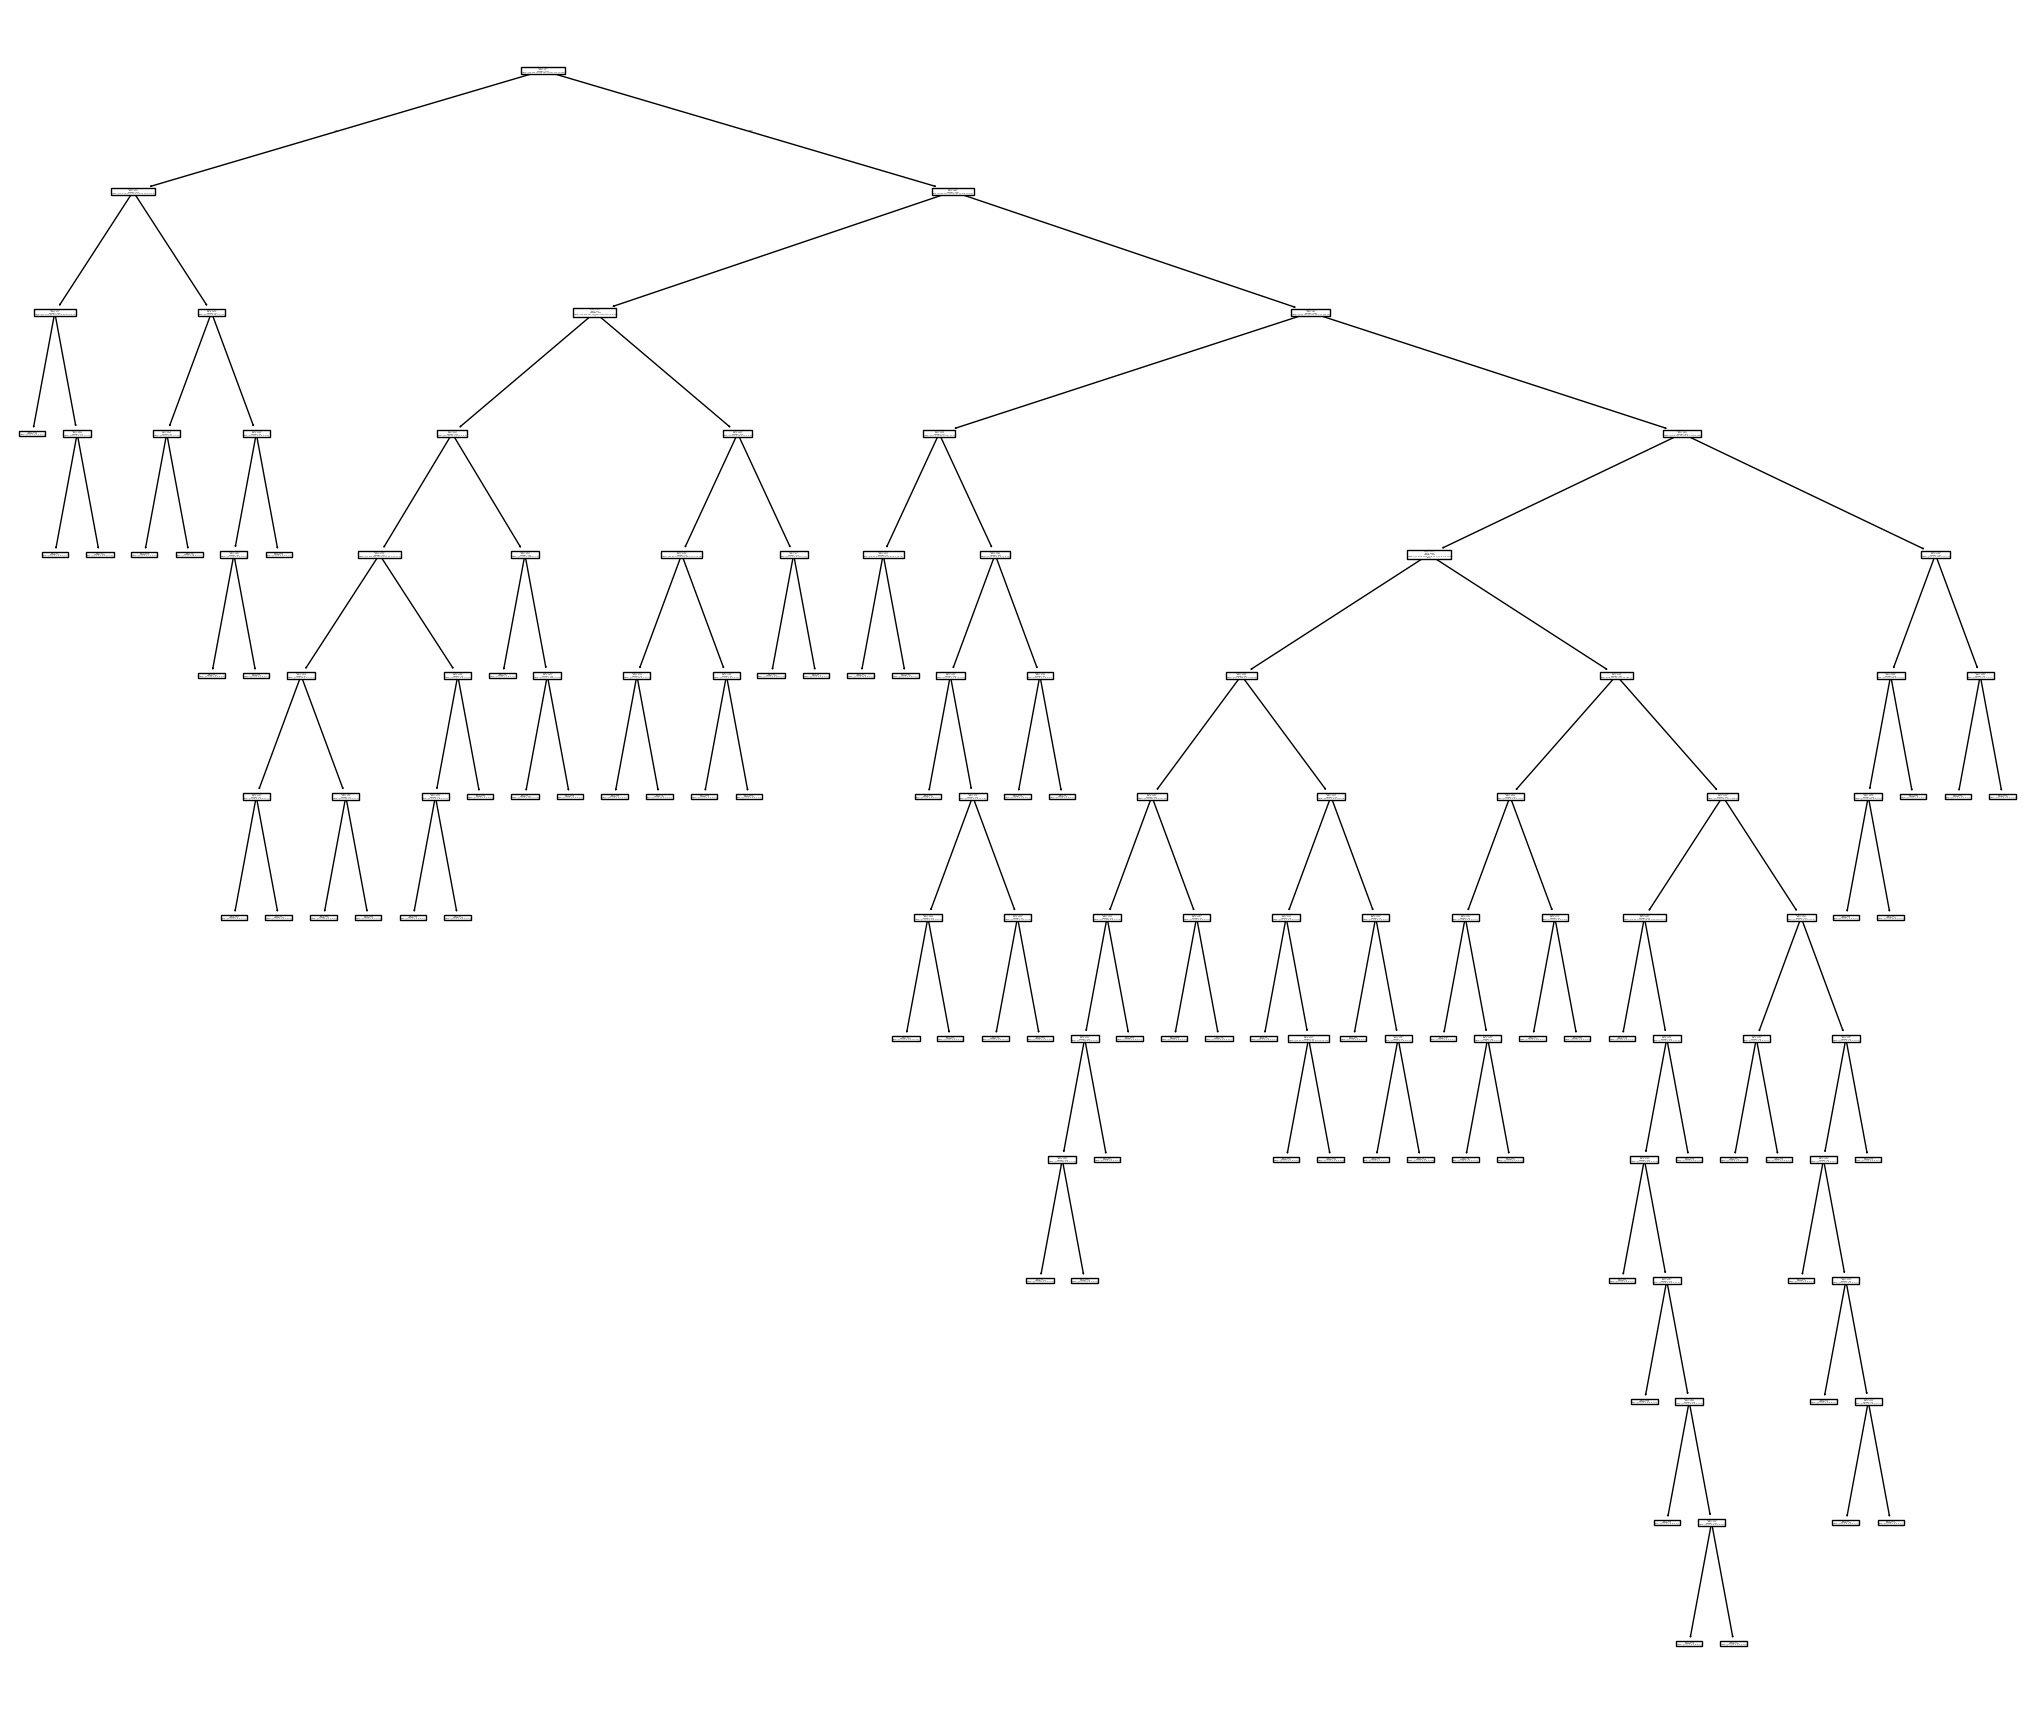

In [37]:
plt.figure(figsize = (26, 22))
plot_tree(tree)
plt.show()

In [38]:
print(export_text(tree))

|--- feature_36 <= 0.50
|   |--- feature_28 <= 2.50
|   |   |--- feature_21 <= 0.50
|   |   |   |--- class: 5
|   |   |--- feature_21 >  0.50
|   |   |   |--- feature_18 <= 6.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_18 >  6.50
|   |   |   |   |--- class: 0
|   |--- feature_28 >  2.50
|   |   |--- feature_21 <= 6.50
|   |   |   |--- feature_5 <= 1.00
|   |   |   |   |--- class: 2
|   |   |   |--- feature_5 >  1.00
|   |   |   |   |--- class: 5
|   |   |--- feature_21 >  6.50
|   |   |   |--- feature_34 <= 7.50
|   |   |   |   |--- feature_46 <= 11.50
|   |   |   |   |   |--- class: 9
|   |   |   |   |--- feature_46 >  11.50
|   |   |   |   |   |--- class: 9
|   |   |   |--- feature_34 >  7.50
|   |   |   |   |--- class: 0
|--- feature_36 >  0.50
|   |--- feature_21 <= 0.50
|   |   |--- feature_42 <= 8.50
|   |   |   |--- feature_5 <= 1.50
|   |   |   |   |--- feature_19 <= 13.50
|   |   |   |   |   |--- feature_37 <= 4.00
|   |   |   |   |   |   |--- feature_58 <= 1.50


In [39]:
tree.tree_.max_depth

13

<b>min_samples_leaf = 0.1</b>

In [42]:
tree = DecisionTreeClassifier(min_samples_leaf = 0.1) 

In [43]:
tree.fit(attributes, target)

DecisionTreeClassifier(min_samples_leaf=0.1)

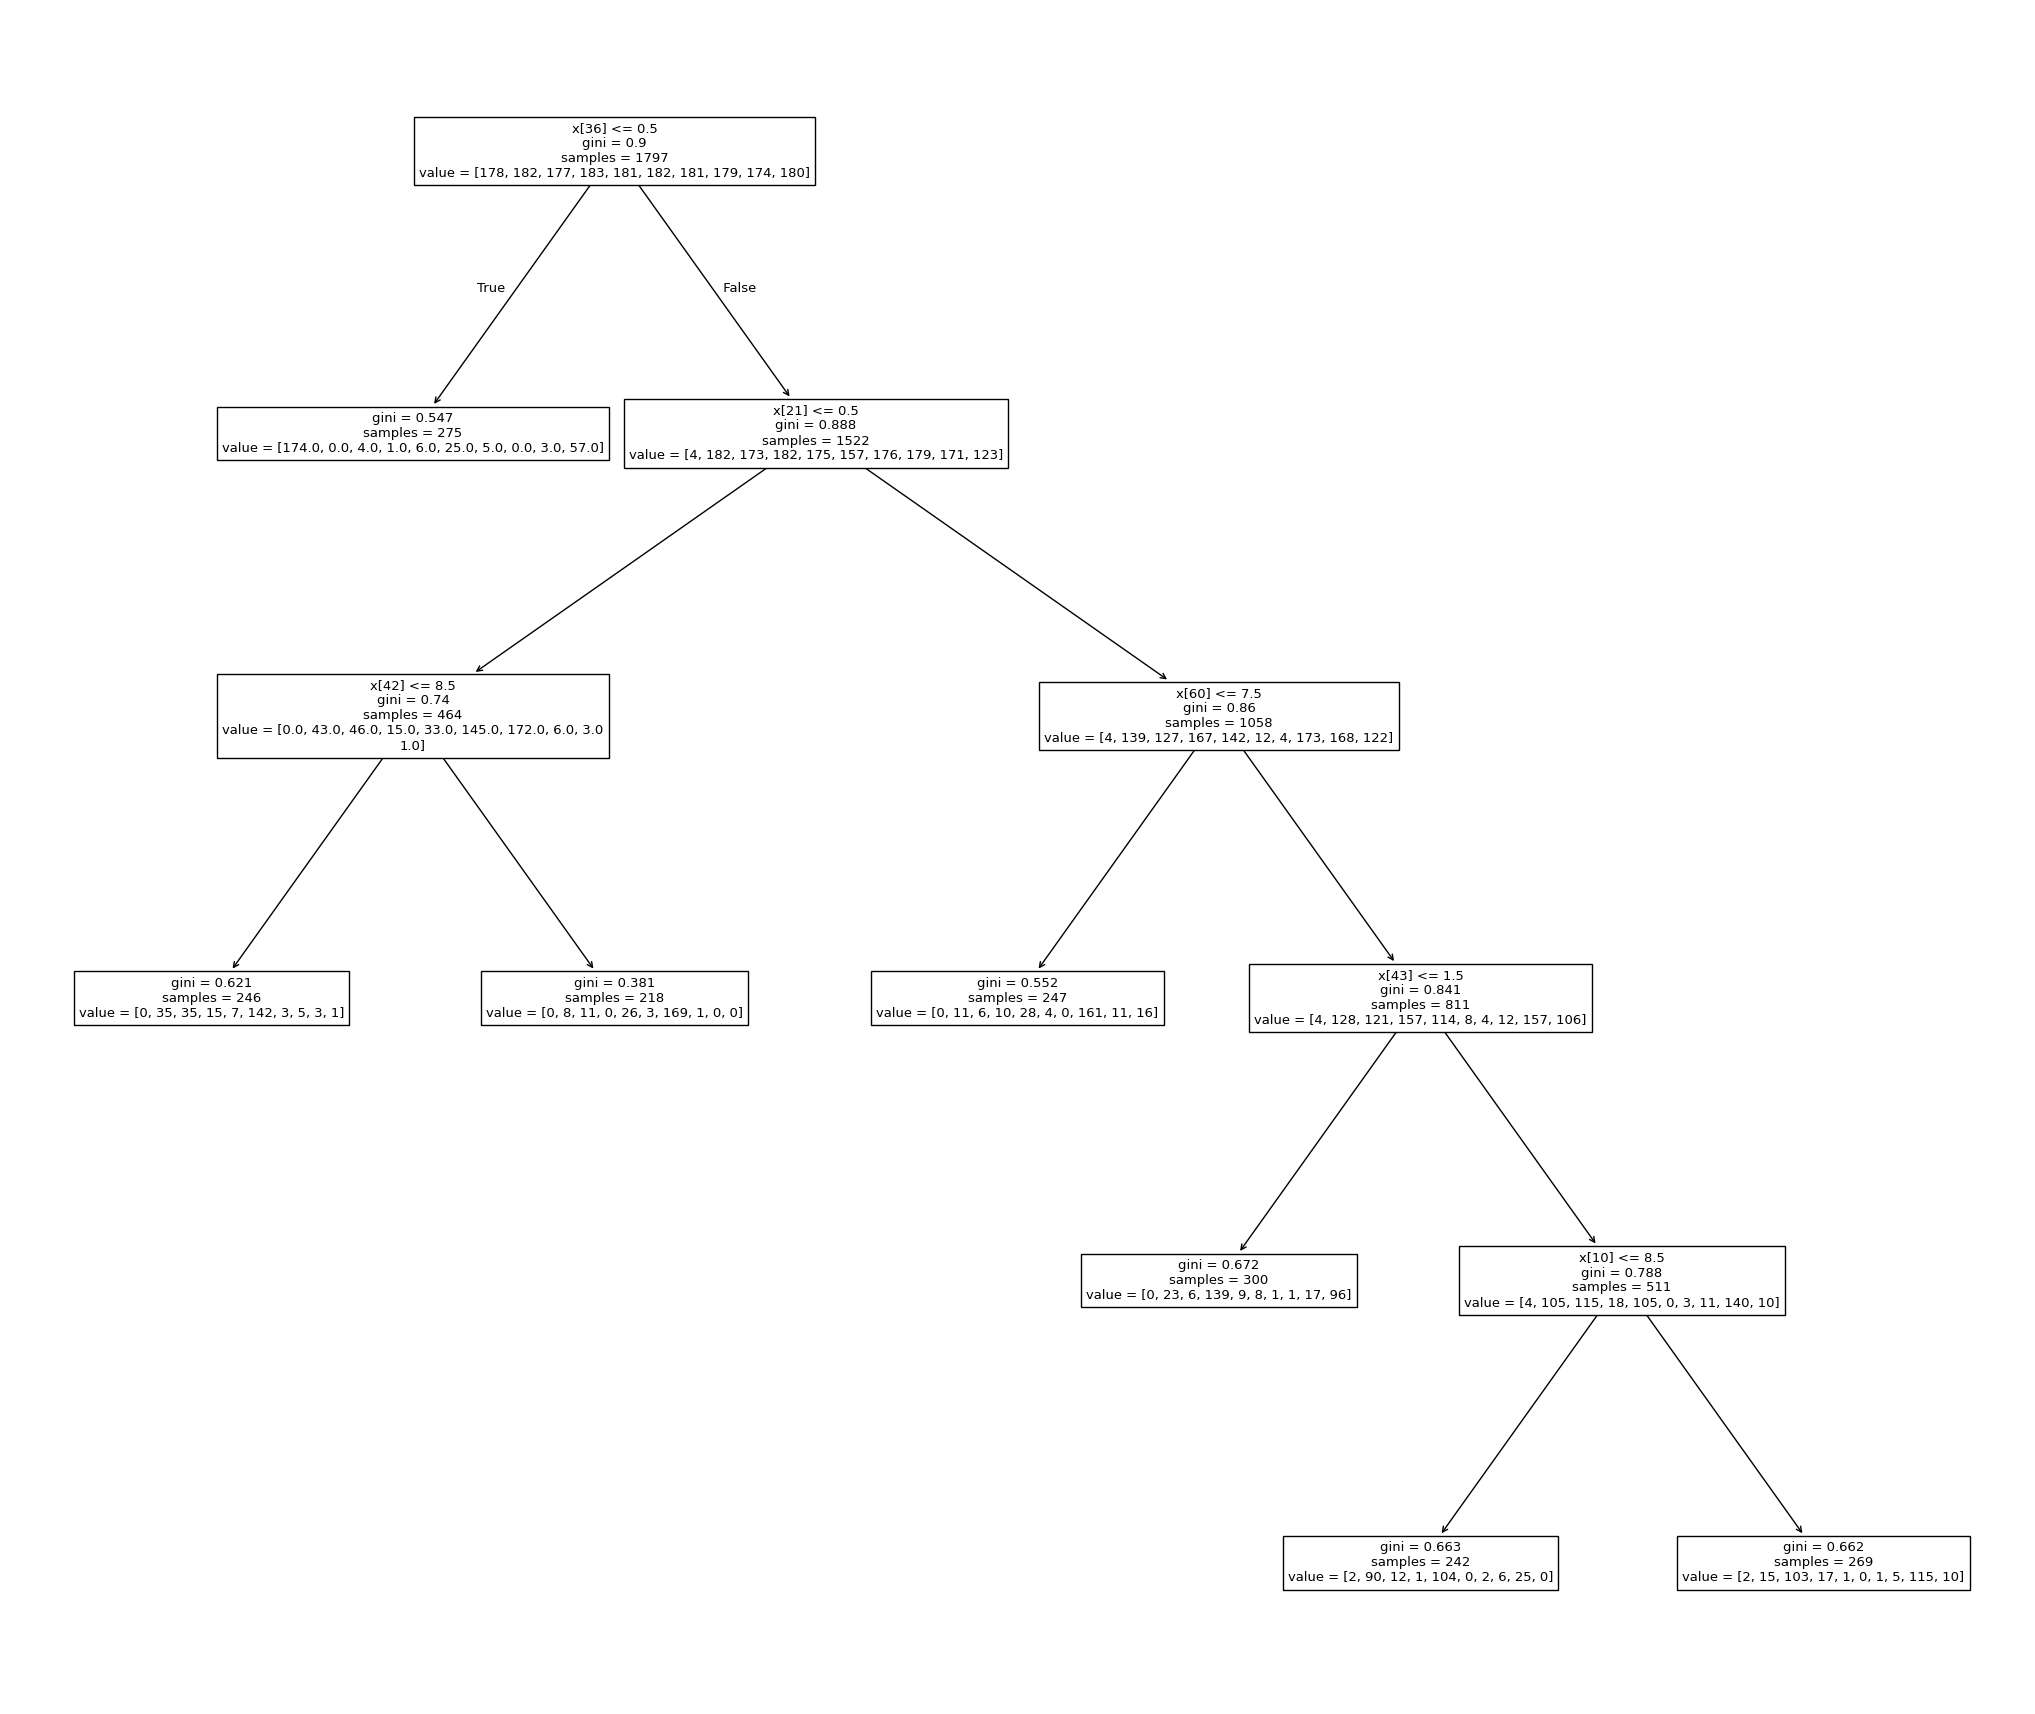

In [44]:
plt.figure(figsize = (26, 22))
plot_tree(tree)
plt.show()

In [45]:
print(export_text(tree))

|--- feature_36 <= 0.50
|   |--- class: 0
|--- feature_36 >  0.50
|   |--- feature_21 <= 0.50
|   |   |--- feature_42 <= 8.50
|   |   |   |--- class: 5
|   |   |--- feature_42 >  8.50
|   |   |   |--- class: 6
|   |--- feature_21 >  0.50
|   |   |--- feature_60 <= 7.50
|   |   |   |--- class: 7
|   |   |--- feature_60 >  7.50
|   |   |   |--- feature_43 <= 1.50
|   |   |   |   |--- class: 3
|   |   |   |--- feature_43 >  1.50
|   |   |   |   |--- feature_10 <= 8.50
|   |   |   |   |   |--- class: 4
|   |   |   |   |--- feature_10 >  8.50
|   |   |   |   |   |--- class: 8



In [46]:
tree.tree_.max_depth

5

<b>min_samples_leaf = 0.05</b>

In [47]:
tree = DecisionTreeClassifier(min_samples_leaf = 0.05) 

In [48]:
tree.fit(attributes, target)

DecisionTreeClassifier(min_samples_leaf=0.05)

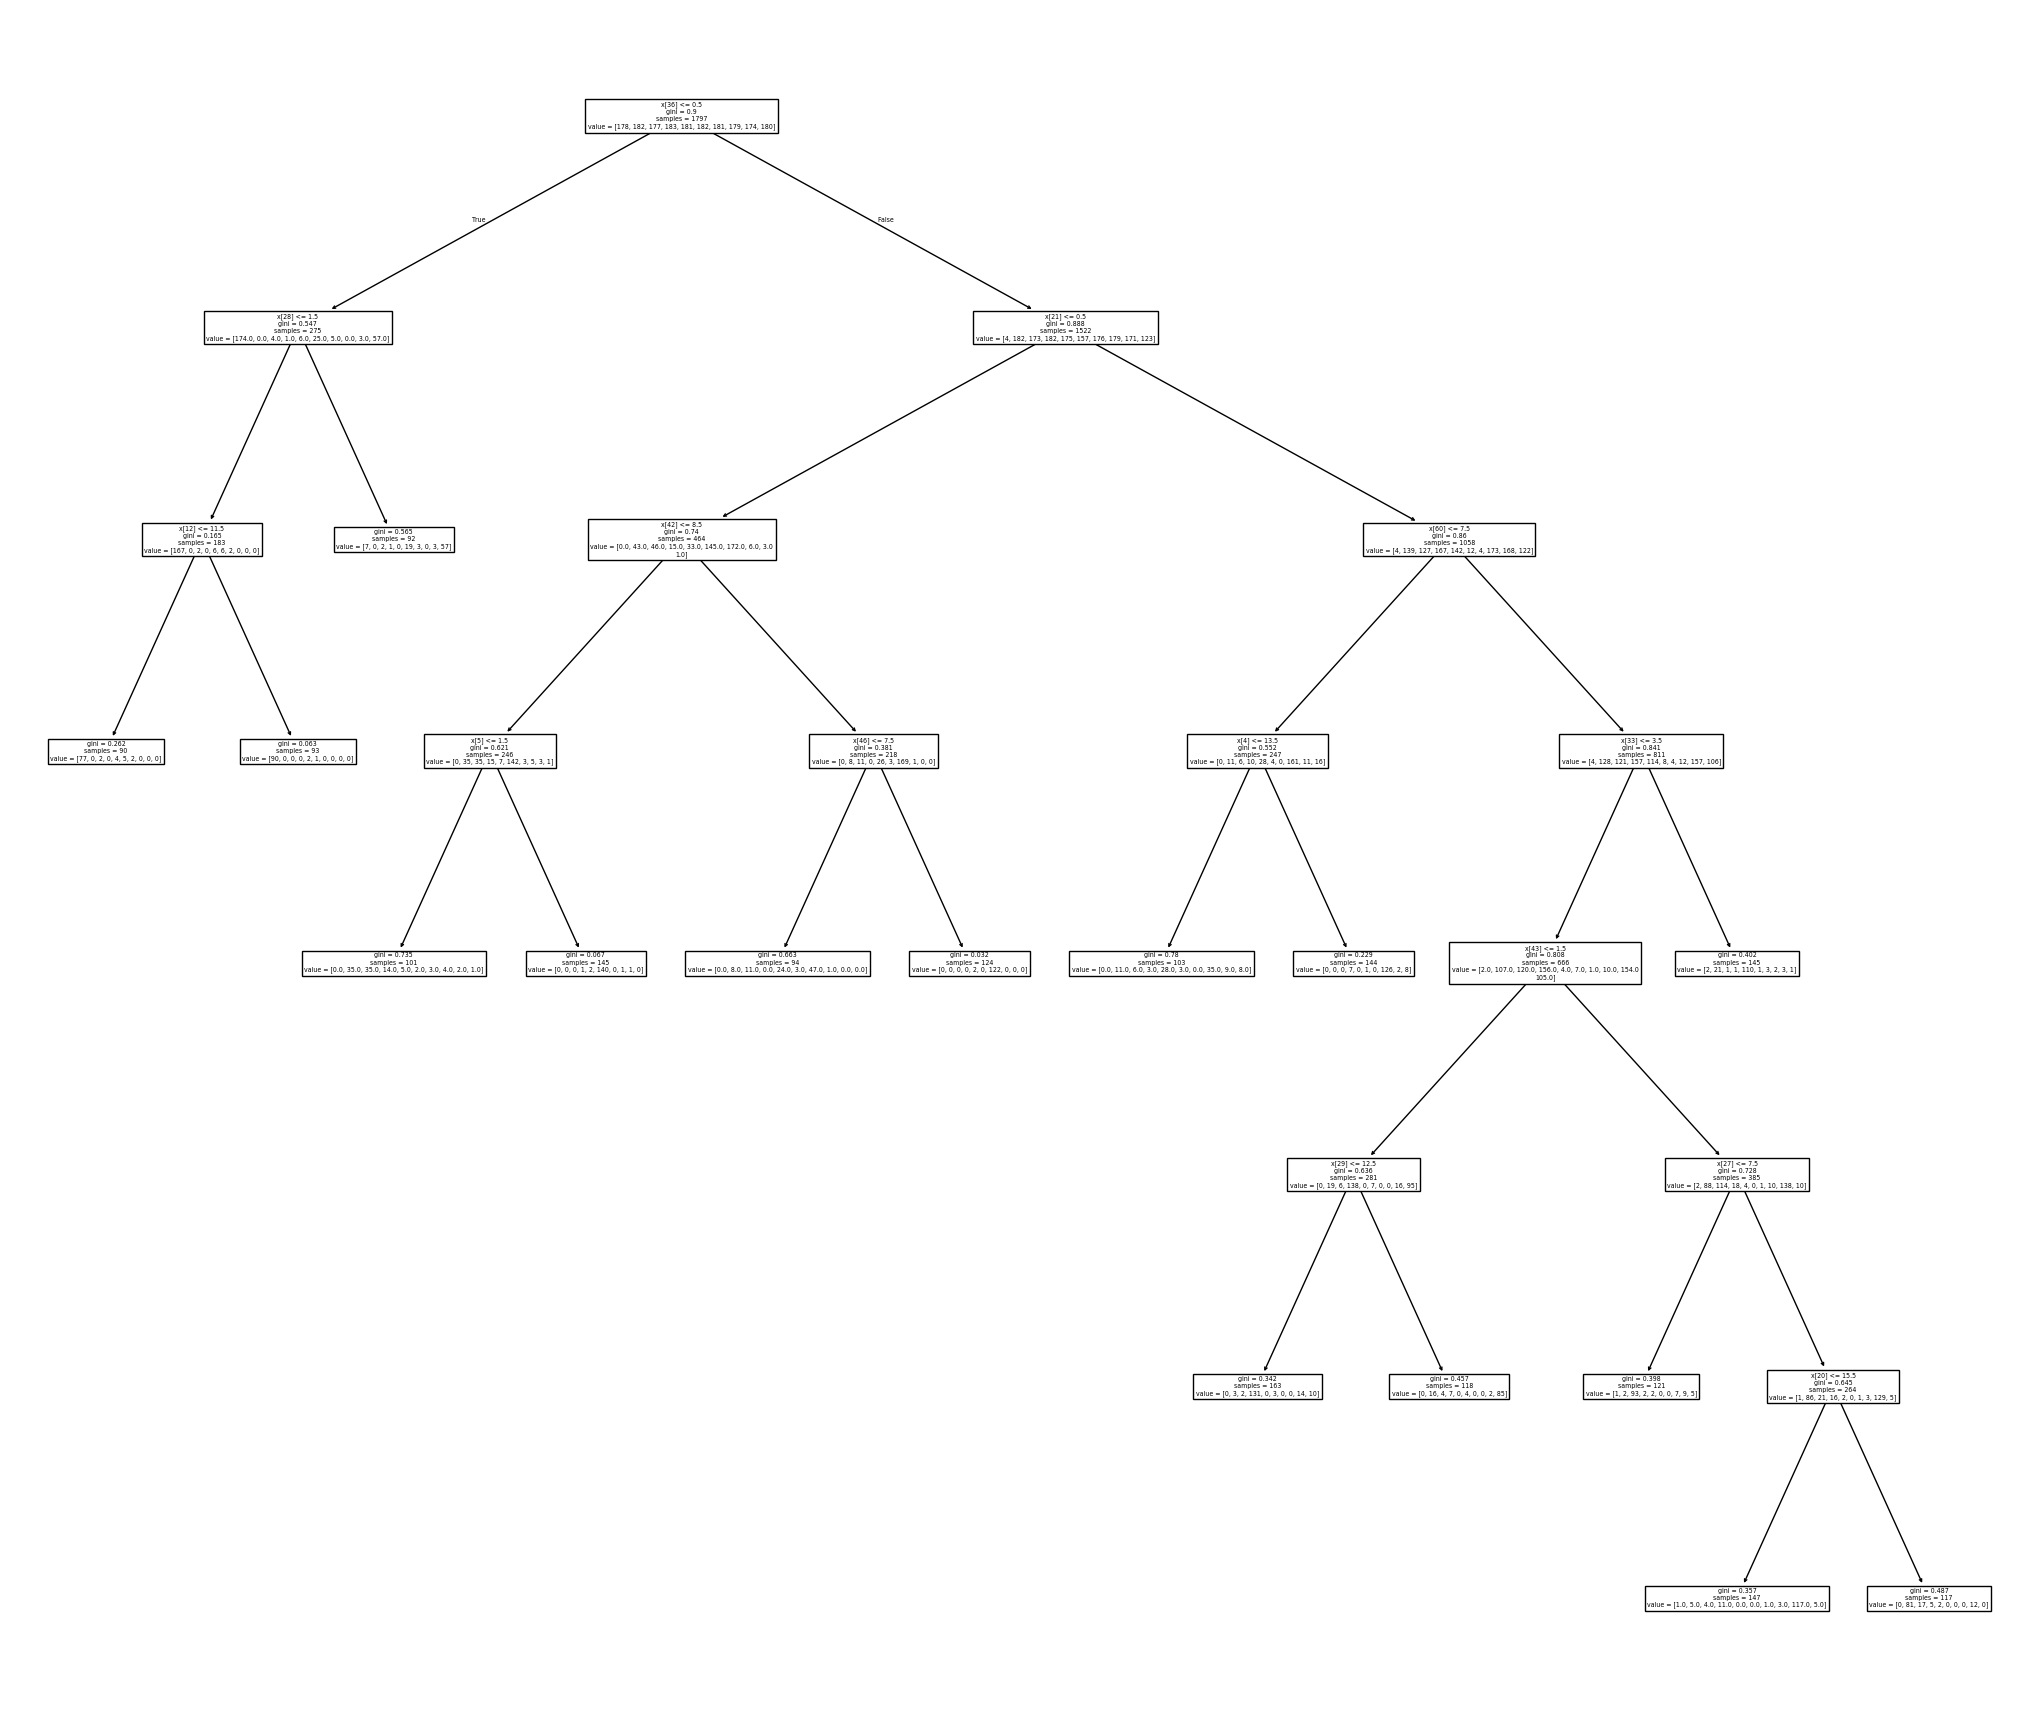

In [49]:
plt.figure(figsize = (26, 22))
plot_tree(tree)
plt.show()

In [50]:
print(export_text(tree))

|--- feature_36 <= 0.50
|   |--- feature_28 <= 1.50
|   |   |--- feature_12 <= 11.50
|   |   |   |--- class: 0
|   |   |--- feature_12 >  11.50
|   |   |   |--- class: 0
|   |--- feature_28 >  1.50
|   |   |--- class: 9
|--- feature_36 >  0.50
|   |--- feature_21 <= 0.50
|   |   |--- feature_42 <= 8.50
|   |   |   |--- feature_5 <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_5 >  1.50
|   |   |   |   |--- class: 5
|   |   |--- feature_42 >  8.50
|   |   |   |--- feature_46 <= 7.50
|   |   |   |   |--- class: 6
|   |   |   |--- feature_46 >  7.50
|   |   |   |   |--- class: 6
|   |--- feature_21 >  0.50
|   |   |--- feature_60 <= 7.50
|   |   |   |--- feature_4 <= 13.50
|   |   |   |   |--- class: 7
|   |   |   |--- feature_4 >  13.50
|   |   |   |   |--- class: 7
|   |   |--- feature_60 >  7.50
|   |   |   |--- feature_33 <= 3.50
|   |   |   |   |--- feature_43 <= 1.50
|   |   |   |   |   |--- feature_29 <= 12.50
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |  

In [51]:
tree.tree_.max_depth

7

All these parameters should not be set at once.

# iris_dataset

In [55]:
iris = load_iris()

In [58]:
# Plot the test data and predicted values in different colors (classes)

X = iris.data[:, :2] # Sepal length, sepal width
y = iris.target
h = 0.02 # Step size

color_dict = {0: "blue", 1: "lightgreen", 2: "red"}
colors = [color_dict[i] for i in y]

depth_2 = DecisionTreeClassifier(max_depth = 2).fit(X, y)
depth_4 = DecisionTreeClassifier(max_depth = 4).fit(X, y)
titles = ["Max depth = 2", "Max depth = 4"]

In [59]:
# create a mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

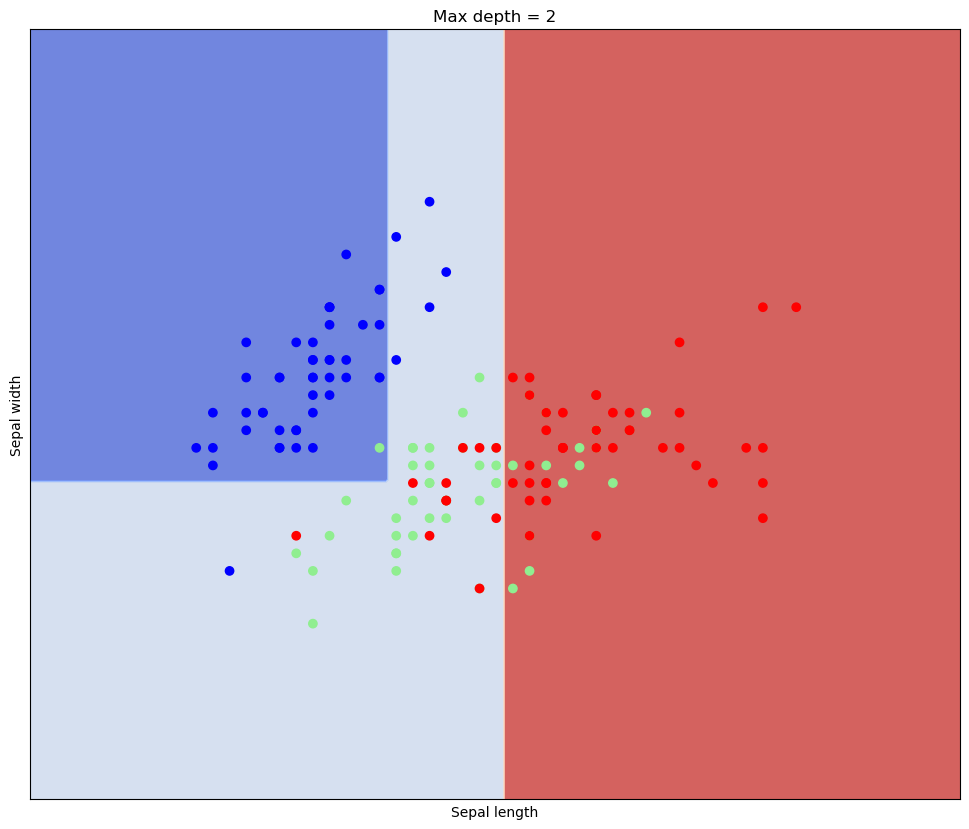

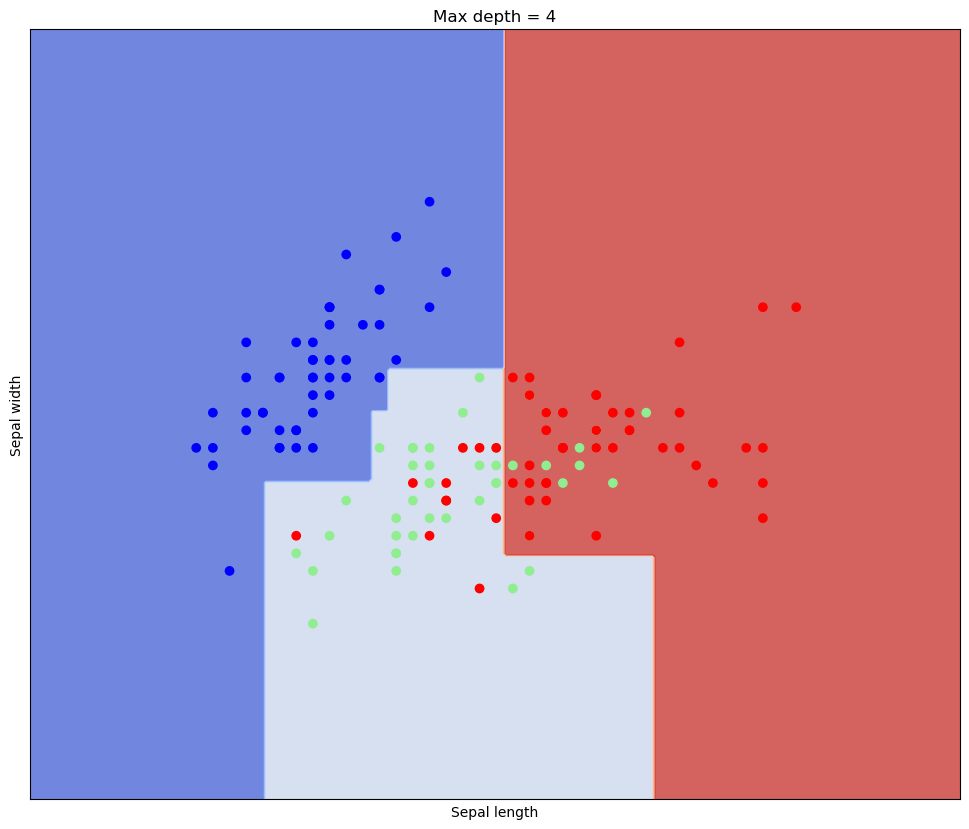

In [61]:
# Create and evaluate predictions for all classifiers
for i, classifier in enumerate((depth_2, depth_4)):
    plt.figure(figsize = (12, 10))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap = plt.cm.coolwarm, alpha = 0.8)
    plt.scatter(X[:, 0], X[:, 1], c = colors)
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()

<p style="font-size: 42px;"><b>Decision Forests</b></p>

Combinations / Ensembels of decision trees.